# Домашнее задание 2 (60 pts)

## Задача 1 (25 pts)
## PLU разложение

- (5 pts) Докажите, что LU разложение существует iff матрица является строго регулярной.
- (15 pts) Поскольку не все матрицы являются строго регулярными, необходимо осуществлять перестановки элементов в строке так, чтобы на диагонали оказался как можно больший по модулю элемент. Это повышает устойчивость процедуры исключения переменных и накопления треугольных факторов. Реализуйте алгоритм вычисления PLU разложения. При этом
    - перестановок столбцов достаточно, хотя если вы реализуете алгоритм для PLUQ разложения, то есть будут переставляться и строки и столбцы, то получите бонусные баллы
    - перестановку и обратную к ней необходимо хранить как одномерные массивы. Вам понадобится реализовать функцию для инкрементального обновления пеерстановки после перехода к следующему диагональному элементу.
    - в качестве опорного элемента достаточно использовать максимальный по модулю элемент в строке
    - не забудьте максимально возможным образом использовать возможности NumPy и исключить циклы там где это возможно  
- (5 pts) Сравните результат работы вашего алгоритма с методом из ```scipy.linalg``` для плохо обусловленной матрицы. Постройте график зависимости работы вашего алгоритма от размерности матрицы, подтверждается ли асимптотика для PLU разложения?  

1) Если существует LU разложение, то запишем LU разложение в блочной форме:
$$L =
        \begin{bmatrix}
        L_{11} & 0 \\
        L_{21} & L_{22}
        \end{bmatrix}
$$
$$U =
        \begin{bmatrix}
        U_{11} & U_{12} \\
        0 & U_{22}
        \end{bmatrix}_{m\times n}
$$

$$A =
        \begin{bmatrix}
        A_{11} & A_{12} \\
        A_{21} & A_{22}
        \end{bmatrix}_{m\times n}
$$

$|A_{11}| = |L_{11}| |U_{11}| \neq 0$ \

2) Пусть матрица является строго регулярной
$$A =
        \begin{bmatrix}
        a_{11} & \dots & A_{12} \\
        \dots & \dots & \dots \\
        A_{n1} & \dots & A_{nn}
        \end{bmatrix}_{n\times n}
$$

$a_{11} \neq 0$ Для получения нулей в первом столбце используем этот элемент как ведущий:


$$T =
        \begin{bmatrix}
        1 & 0 & dots & 0\\
        \psi_2 & \huge{I} \\
        \dots \\
        \psi_n
        \end{bmatrix}_{n\times n}
$$
Где I - блочная единичная матрица, а $\psi_i = -\frac{a_{i1}}{a_{11}}$

Тогда 
$$TA =
        \begin{bmatrix}
        a_{11} & a_{12} & dots & a_{1n}\\
        0 & \huge{H} \\
        \dots \\
        0
        \end{bmatrix}_{n\times n}
$$

Где H сохраняет свойства регулярность, так как мы использовали только регулярные преобразования и если определитель какого-то главного минора H равен 0, то и усходной существовал бы минор определитель также был бы равен 0, так как он был бы равен произведению $a_{11}$ на этот минор, после аналогичных элементарных преобразований.

In [198]:
#Алгоритм для реализации PLU разложения

def plu_decomposure(M):
    n = M.shape[0]
    p, L, U = np.arange(n), np.identity(n), M.copy()
    for i in range(n - 1):
        pivot = np.argmax(np.abs(U[i:, i])) + i
        if pivot != i:
            p[i], p[pivot] = p[pivot], p[i]
            L[(i, pivot), :i] = L[(pivot, i), :i]
            U[(i, pivot), ] = U[(pivot, i), ]
        coef = U[i + 1:, i] / U[i, i]
        L[i + 1:, i] = coef
        U[i + 1:] -= coef[:, np.newaxis] * U[i]
    return p, L, U

In [199]:
#создаем плохо обсуловленную матрицу(Гильберта)

import numpy as np
n = 1000
hilbert = np.array([[1.0/(i + j + 1) for i in range(n)] for j in range(n)])

In [200]:
import numpy as np

p, L, U = plu_decomposure(hilbert)
print(np.linalg.norm(np.dot(L, U) - hilbert[p]))

8.368135476694268e-16


In [57]:
import scipy


def scipy_PLU(a):
    return scipy.linalg.lu(a, permute_l=True)
L, U = scipy_PLU(hilbert)
print(np.linalg.norm(np.dot(L, U) - hilbert))

6.927733401078432e-16


In [141]:
import time
losses = np.zeros(100)
losses_scipy = np.zeros(100)
time_values = np.zeros(100)
time_scipy = np.zeros(100)
for i in range(10, 1010, 10):
    hilbert_tmp = hilbert[:i, :i].copy()
    begin = time.time()
    index, L, U = plu_decomposure(hilbert_tmp)
    end = time.time()
    time_values[(i - 10) // 10] = end - begin
    losses[(i - 10) // 10] = np.linalg.norm(np.dot(L, U) - hilbert_tmp[index])
    begin = time.time()
    L, U = scipy_PLU(hilbert_tmp)
    end = time.time()
    time_scipy[(i - 10) // 10] = end - begin
    losses_scipy[(i - 10) // 10] = np.linalg.norm(np.dot(L, U) - hilbert_tmp)

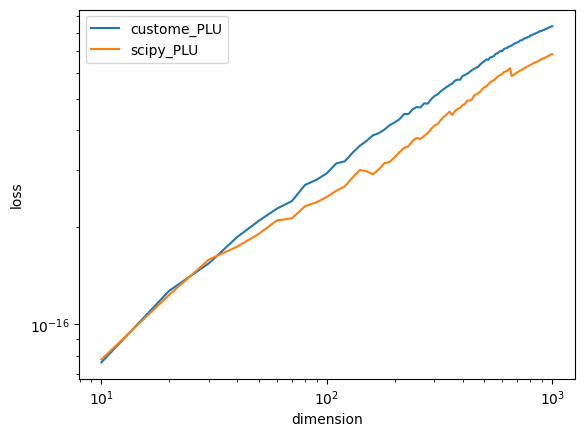

In [142]:
import matplotlib.pyplot as plt
plt.plot(np.arange(10, 1010, 10), losses, label = "custome_PLU")
plt.plot(np.arange(10, 1010, 10), losses_scipy, label = "scipy_PLU")
plt.legend()
plt.xscale("log")
plt.xlabel("dimension")
plt.ylabel("loss")
plt.yscale("log")

Text(0, 0.5, 'time')

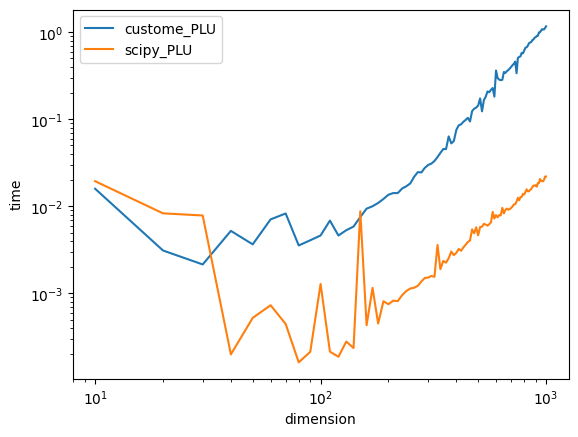

In [144]:
args = np.arange(10, 1010, 10)

plt.plot(np.arange(10, 1010, 10), time_values, label = "custome_PLU")
plt.plot(np.arange(10, 1010, 10), time_scipy, label = "scipy_PLU")
plt.xscale("log")
plt.yscale("log")
plt.legend()
plt.xlabel("dimension")
plt.ylabel("time")

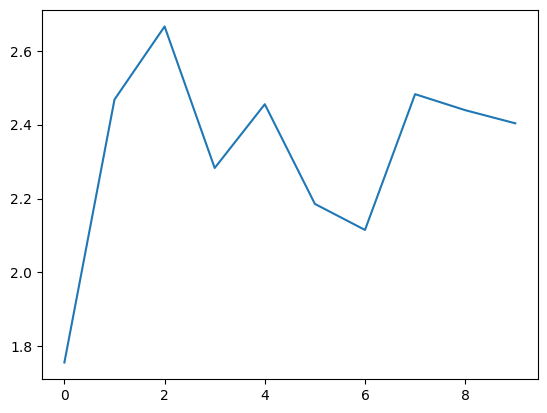

In [160]:
time_ratios = [np.log10(time_values[90 + i] / time_values[i]) for i in range(10)]
plt.plot(np.arange(0, 10), time_ratios, label = "custome_PLU")

Как видим, ассимптотика для PLU подтвердилась.

## Задача 2 (35 pts)

## Ускорение Андерсена

Многие итерационные методы в вычислительной линейной алгебре могут быть записаны в форме итерации неподвижной точки

$$ x_{k+1} = f(x_k), $$

так что решение задачи удовлетворяет условию $x^* = f(x^*)$. Достаточным условием сходимости такого итерационного процесса для функции $f$ является её Липшецевость с константой $L < 1$ и непрерывная дифференцируемость в окрестности $x^*$  так что $|f'(x^*)| < L$. 
Вокруг итераций такого типа существует довольно много разнообразной теории, но нас будет интересовать специальный способ ускорения сходимости такого итерационного процесса под названием **ускорение Андерсена**. 
Основная идея метода в представлении следующего приближения как линейной комбинации нескольких предыдущих значений функции $f$, более формально

$$ x_{k+1} = \sum_{i=0}^{m-1} \alpha_i f(x_{k-m+i}), $$

где $m$ - это размер истории, который необходимо хранить и который задаётся до запуска метода, и $\alpha \in \mathbb{R}^n$ ищется как решение следующей задачи оптимизации

$$ \min_{\alpha} \| R\alpha\|_2, \quad \text{subject to} \quad \sum_{i=0}^{m-1} \alpha_i = 1, $$

где $R = [r_0, \ldots, r_{m-1}]$ и $r_i = f(x_i) - x_i$ вектора невязок.
Отметим, что при $m=1$ мы получим исходную итерацию неподвижной точки.

Заметим, что задача поиска коэффициентов $\alpha_i$ очень похожа на стандартную задачу наименьших квадратов, которую можно решить с помощью функции ```np.linalg.lstsq```, но присутствует дополнительное нормировочное ограничение на коэффициенты. 

- Придумайте, как равносильно преобразовать задачу к виду, который позволит получить решение с помощью функции ```np.linalg.lstsq```.
- Сравните получаемый ответ на случайных данных (матрица $R$) с решением исходной задачи, полученным с помощью функции ```scipy.optimize.minimize```.

### Степенной метод (10 pts)

- Запишите степенной метод в виде итерации неподвижной точки. Чему равна функция $f$?
- Реализуйте ускорение Андерсена для степенного метода с использованием подхода к решению вспомогательной задачи на коэффициенты $\alpha$, полученным выше. Cравните сходимости обычного и ускоренного степенного метода по времени и числу итераций? Рассмотрите различные значения для размера истории и проанализируйте влияние этого гиперпараметра на скорость сходимости (по времени и по числу итераций) 

### Неотрицательное матричное разложение (20 pts)

Задача неотрицательного матричного разложения заключается в поиске разложения данной матрицы на факторы с неотрицательными компонентами, то есть решение следующей задачи оптимизации

$$ \min_{W \geq 0, H \geq 0} \|X - WH\|_F^2, $$

где $X \in \mathbb{R}^{m \times n}$, $W \in \mathbb{R}^{m \times k}$ и $H \in \mathbb{R}^{k \times n}$, так что $k < n$. Известно что такая задача является NP-полной, но существуют различные подходы к её приближённому решению. Одним из таких подходов является идея **попеременной оптимизации**, в которой по очереди фиксируются матрицы $W^{(k)}$ и $H^{(k)}$ и обновляются матрицы $H$ и $W$ соответственно. Так как при фиксированной одной матрице задача становится очень похожа на задачу линейных наименьших квадратов, но с дополнительным ограничением неотрицательности на искомую матрицу.

- Реализуйте наивный алгориитм приближённого решения задачи неотрицательного матричного разложения на основе попеременной оптимизации. Для получения решения всмомогательных задач можно проецировать результат решения линейной задачи наименьших квадратов на множество матриц с неотрицательными элементами. Это делается простым занулением отрицательных элементов, что надеюсь очевидно для вас. Существуют [другие подходы](https://arxiv.org/pdf/1401.5226.pdf) к получению промежуточных значений для матриц $W^{(k)}$ и $H^{(k)}$, которые вы можете протестировать, если выше описанная стратегия не будет сходиться. 


- Одну итерацию обновления матриц $(W, H)$ можно представить как итерацию неподвижной точки вида 

$$(W^{(k+1)}, H^{(k+1)}) = F(W^{(k)}, H^{(k)}), $$

где внутри $F$ спрятаны решения вспомогательных задач оптимизации. А значит реализованный вами выше метод можно ускорить с помощью ускорения Андерсена. Реализуйте ускоренный таким образом метод приближённого решения задачи неотрицательного матричного разложения.

- Рассмотрите задачу тематического моделирования, то есть разбиения документов по темам на основе слов, которые в документах используются. Эту задачу можно формализовать с помощью неотрицательного матричного разложения матрицы "слов-документов", элемент $(i, j)$ которой равен 1 если $i$-ое слово используется в $j$-ом документе. Это самый простой способ представления текстовых документов в виде пригодном для их анализа методами вычислительной линейной алгебры. Можно протестировать чуть более продвинутый способ представления слов и документов под названием tf-idf, подробности [тут](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html). Для построения матрицы $X$ используйте тестовый датасет [20newsgroup](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_20newsgroups.html#sklearn.datasets.fetch_20newsgroups). В контексте этого приложения параметр $k$ - это число тем, матрица $W$ содержит распределение слов по темам, а матрица $H$ коэффициенты разложения каждого документа по темам. Так как все элементы матриц неотрицательны, мы можем интерпретировать их как веса и доли, что упрощает интерпретацию результатов в рамках выбранной предметной области. Сравните на этих данных сходимость базовой и ускоренной реализации метода приближённого решения задачи неотрицательного матричного разложения (по времени и по итерациям). Прокомментируйте полученные результаты. 


Запишем степенной метод:
$x^{(k)} = \frac{Ax^{(k - 1)}}{\|Ax^{(k - 1)}\|}$
Тогда $f(x) = \frac{Ax}{\|Ax\|}$